# Erdos Renyi random graph with Python - some examples

### Import needed Packages

In [23]:
import numpy as np
import math
import networkx as net
import matplotlib.pyplot as plt
from pyvis.network import Network as netviz

### Set parameters for the random Graph

In [24]:
N = 100
p = 0.05

### Generate random Graph as `G`

In [25]:
G = net.gnp_random_graph(N,p)

### Check if the Graph is connected and if not choose the largest connected component as `G0`

In [26]:
conn = net.is_connected(G)

if conn:
    print("the graph is connected")
    G0 = G
else:
    GCC = sorted(net.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(GCC[0])
    print("the graph is not connected")

n = len(G0)
print("number of vertices in G0 is %d" %n)

the graph is not connected
number of vertices in G0 is 98


### collect the degrees of `G0` in a list

In [27]:
deg = {}   # initialize an empty dictionary
for v in G0.nodes():
    deg[v] = net.degree(G0,v)
print(deg)
deg_val = deg.values()

{0: 3, 1: 3, 2: 5, 3: 4, 4: 3, 5: 6, 6: 11, 7: 4, 8: 6, 9: 5, 10: 5, 11: 3, 12: 4, 13: 8, 14: 7, 15: 3, 16: 5, 17: 5, 18: 4, 19: 11, 20: 5, 21: 5, 22: 4, 23: 3, 24: 5, 25: 3, 26: 7, 27: 1, 28: 5, 29: 8, 30: 4, 31: 5, 32: 1, 33: 2, 34: 2, 35: 3, 36: 6, 37: 7, 38: 6, 39: 5, 40: 7, 41: 3, 42: 3, 43: 3, 44: 7, 46: 8, 47: 5, 48: 6, 49: 4, 50: 5, 51: 4, 52: 7, 53: 2, 54: 6, 55: 7, 56: 4, 57: 3, 58: 7, 59: 5, 60: 4, 61: 7, 62: 5, 63: 1, 64: 3, 65: 6, 66: 1, 67: 8, 68: 5, 69: 4, 70: 2, 72: 2, 73: 2, 74: 3, 75: 4, 76: 7, 77: 9, 78: 7, 79: 7, 80: 3, 81: 3, 82: 5, 83: 6, 84: 7, 85: 2, 86: 2, 87: 6, 88: 6, 89: 6, 90: 4, 91: 5, 92: 8, 93: 4, 94: 7, 95: 4, 96: 4, 97: 2, 98: 3, 99: 4}


### Add a property `size` to each vertex depending on the degree of the vertex

In [28]:
for v in G0.nodes():
    G0.nodes[v]["size"] = math.sqrt(deg[v])*10

### Plot a Histogram of the degrees in `G0`

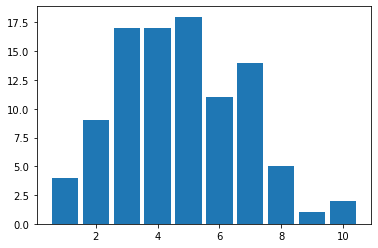

In [29]:
num, bins, obj = plt.hist(deg_val, bins=max(deg_val)-min(deg_val), align="left", rwidth=0.85)

### Visualize graph

In [30]:
viz = netviz(height=800, width=800, notebook=True)
viz.barnes_hut()
viz.from_nx(G0)
viz.show("net.html")